In [4]:
pip install tsad


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install arimafd

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 KB 585.4 kB/s eta 0:00:00m eta 0:00:010:01:01
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4c998fa3db0d1d34624e9b1095a90920c44e8d464fd86ea1cfbe4d3005740a12
  Stored in directory: /home/gishb/.cache/pip/wheels/c5/88/35/cc8a1e198b27a1d3d9d3f9b30090b9d5531778847835472ec4
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sympy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# libraries importing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from io import StringIO
import requests
from tsad.evaluating.evaluating import evaluating
import os

# libraries importing
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import pickle
from itertools import product
from sympy import diff, symbols, sympify, Symbol, poly
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from time import time
import matplotlib.gridspec as gridspec

# additional modules
import sys
sys.path.append('../utils')

In [5]:
from arimafd import *
import os

In [6]:
def dataframe_expirement(i):
    if i == 1:
        url = "https://storage.yandexcloud.net/cloud-files-public/dataframe.csv" 
        df = pd.read_csv(StringIO(requests.get(url).content.decode('utf-8')), sep='|')
    else:
        url = "https://storage.yandexcloud.net/cloud-files-public/noname_ECG_2022.csv" 
        df = pd.read_csv(StringIO(requests.get(url).content.decode('utf-8')), sep=',')
    return df

In [7]:
df = dataframe_expirement(1)
df = df[df[df.columns[0]] == 'xxxAA684G']

df.replace(['-9999', -9999,'missing','#'], np.nan, inplace=True)
df = df[df['unitless'].notna()]
df = df[df['uR/h'].notna()]
df_ = df.drop(axis=1, labels=(df.columns[0])) \
    .drop(axis=1, labels=(df.columns[1]))[['uR/h', 'unitless']].reset_index(drop=True)

In [8]:
# ts_data_1, ts_data_2 = dataframe_expirement(1), dataframe_expirement(0).iloc[2500:].reset_index().drop(labels='index',axis=1)

In [9]:
ts_data_1 = df_

In [10]:
from scipy.signal import find_peaks

In [11]:
def plot_data_scores_and_selected_window(ts, score_list, window_size_selected):
    f, ax = plt.subplots(2, 1, figsize=(30, 20))
    ax[0].plot(ts)
    ax[0].vlines(x=window_size_selected, ymin=min(ts), ymax=max(ts),
        linestyle = ':',
        linewidth = 6,
        color = 'darkblue')
    ax[0].set_title("ts")
    ax[1].plot(score_list, "r")
    ax[1].set_title("score")
    f.show()

In [13]:
# dataset characteristics printing
print(f'A number of datasets: {2}\n')
print(f'Shape of the well dataset: {ts_data_1.shape}\n')
# print(f'Shape of the medical dataset: {ts_data_2.shape}\n')
cp_1 = []
temp_value_second = 0
for i in range(len(ts_data_1)):
    temp_value = ts_data_1['unitless'][i]
    if temp_value != temp_value_second:
        cp_1.append(1)
    else:
        cp_1.append(0)
    temp_value_second = temp_value
cp_1[0] = 0
# cp_2 = []
# peaks, _ = find_peaks(ts_data_2['EcgWaveform'], distance=250)
# for i in range(len(ts_data_2)):
#     if i not in peaks:
#         cp_2.append(0)
#     else:
#         cp_2.append(1)
ts_data_1['change_points'] = cp_1
# ts_data_2['change_points'] = cp_2
print(f'A number of datasets: {2}\n')
print(f'Shape of the well dataset: {ts_data_1.shape}\n')
# print(f'Shape of the medical dataset: {ts_data_2.shape}\n')
n_cp_1 = cp_1.count(1)
# n_cp_2 = cp_2.count(1)
print(f'A number of changepoints in the well dataset: {n_cp_1}\n')
# print(f'A number of changepoints in the medical dataset: {n_cp_2}\n')
print(f'Head of the well dataset:')
display(ts_data_1.head())
# print(f'Head of the well dataset:')
# display(ts_data_2.head())

A number of datasets: 2

Shape of the well dataset: (10664, 2)

A number of datasets: 2

Shape of the well dataset: (10664, 3)

A number of changepoints in the well dataset: 74

Head of the well dataset:


,uR/h,unitless,change_points
0,88.625,2.0,0
1,107.250,2.0,0
2,108.420,2.0,0
3,109.590,2.0,0
4,110.990,2.0,0


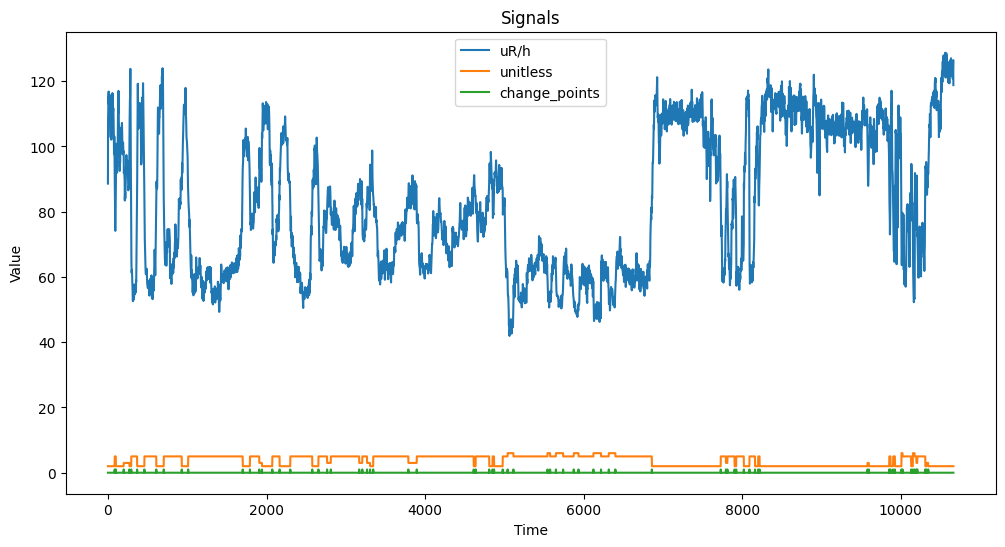

In [14]:
# well dataset visualizing
ts_data_1.plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

In [15]:
# # medical dataset visualizing
# ts_data_2.plot(figsize=(12,6))
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Signals')
# plt.show()

In [17]:
# list_of_df = [ts_data_1[['change_points','uR/h','ohmm']], ts_data_2.drop('Time', axis=1)]
list_of_df = df_

In [19]:
from datetime import datetime, timedelta

In [22]:
t_0 = np.arange(len(list_of_df)).astype('datetime64[s]')
# t_1 = np.arange(len(list_of_df[1])).astype('datetime64[s]')

In [24]:
list_of_df =list_of_df.set_index(t_0)
# list_of_df[1]=list_of_df[1].set_index(t_1)


In [26]:
# true_cp = [df.change_points for df in list_of_df]
true_cp = df_.change_points

In [27]:
from datetime import datetime, timedelta

In [29]:
%%time
if os.path.exists(r'tensors.pickle'):
    with open(r'tensors.pickle', 'rb') as f:
        tensors = pickle.load(f)
else:
    tensors = []
#     for df in list_of_df:
    a = Anomaly_detection(df_.drop(columns=['change_points']))
    tensors.append(a.generate_tensor(ar_order=100))
    with open(r'tensors.pickle', 'wb') as handle:
        pickle.dump(tensors, handle, protocol=pickle.HIGHEST_PROTOCOL)

/home/gishb/.local/lib/python3.10/site-packages/arimafd/tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
/home/gishb/.local/lib/python3.10/site-packages/arimafd/tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)


Time seconds: 57.21248173713684
Time seconds: 63.111825942993164
CPU times: user 2min, sys: 103 ms, total: 2min
Wall time: 2min


In [36]:
metrics = range(1,6)
windows= [20,50,100,150]
window_insensitivitys = [20,50,100,150]
history = []
from tsad.evaluating.evaluating import evaluating 

for No_metric,window,window_insensitivity in product(metrics,windows,window_insensitivitys):
    print('XXX',No_metric,window,window_insensitivity)
    predicted_cp=[]
    predicted_cp1 = []
#     for i,df in enumerate(list_of_df):

    acci = df_.change_points
    a = Anomaly_detection(df_)
    a.tensor = tensors[i]
    a.proc_tensor(No_metric=No_metric, window=window, window_insensitivity=window_insensitivity)
    predicted_cp.append(a.bin_metric)
#     nab = evaluating(true_cp, predicted_cp[0], metric='nab', numenta_time='30 sec')
#     history.append([No_metric, window, window_insensitivity, nab['Standart'], nab['LowFP'], nab['LowFN']])
#     print(history)
#     print()
#     print()
history = pd.DataFrame(history, columns=['No_metric','window','window_insensitivity','Standart','LowFP','LowFN'])

XXX 1 20 20
XXX 1 20 50
XXX 1 20 100
XXX 1 20 150
XXX 1 50 20
XXX 1 50 50
XXX 1 50 100
XXX 1 50 150
XXX 1 100 20
XXX 1 100 50
XXX 1 100 100
XXX 1 100 150
XXX 1 150 20
XXX 1 150 50
XXX 1 150 100
XXX 1 150 150
XXX 2 20 20
XXX 2 20 50
XXX 2 20 100
XXX 2 20 150
XXX 2 50 20
XXX 2 50 50
XXX 2 50 100
XXX 2 50 150
XXX 2 100 20
XXX 2 100 50
XXX 2 100 100
XXX 2 100 150
XXX 2 150 20
XXX 2 150 50
XXX 2 150 100
XXX 2 150 150
XXX 3 20 20
XXX 3 20 50
XXX 3 20 100
XXX 3 20 150
XXX 3 50 20
XXX 3 50 50
XXX 3 50 100
XXX 3 50 150
XXX 3 100 20
XXX 3 100 50
XXX 3 100 100
XXX 3 100 150
XXX 3 150 20
XXX 3 150 50
XXX 3 150 100
XXX 3 150 150
XXX 4 20 20
XXX 4 20 50
XXX 4 20 100
XXX 4 20 150
XXX 4 50 20
XXX 4 50 50
XXX 4 50 100
XXX 4 50 150
XXX 4 100 20
XXX 4 100 50
XXX 4 100 100
XXX 4 100 150
XXX 4 150 20
XXX 4 150 50
XXX 4 150 100
XXX 4 150 150
XXX 5 20 20
XXX 5 20 50
XXX 5 20 100
XXX 5 20 150
XXX 5 50 20
XXX 5 50 50
XXX 5 50 100
XXX 5 50 150
XXX 5 100 20
XXX 5 100 50
XXX 5 100 100
XXX 5 100 150
XXX 5 150 20
X

# Results

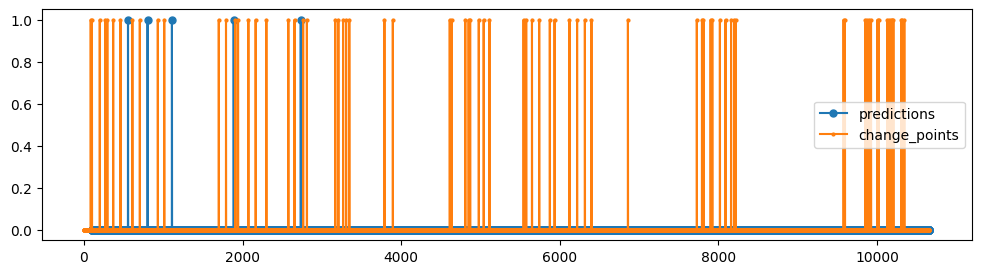

In [38]:
# true changepoint indices selection
# true_cp = [df.change_points for df in list_of_df]
true_cp = df_.change_points 

predicted_cp[0].plot(figsize=(12,3), label='predictions', marker='o', markersize=5)
true_cp.plot(marker='o', markersize=2)
plt.legend();

In [39]:
# # true changepoint indices selection
# true_cp = [df.change_points for df in list_of_df]

# predicted_cp[1].plot(figsize=(12,3), label='predictions', marker='o', markersize=5)
# true_cp[1].plot(marker='o', markersize=2)
# plt.legend();

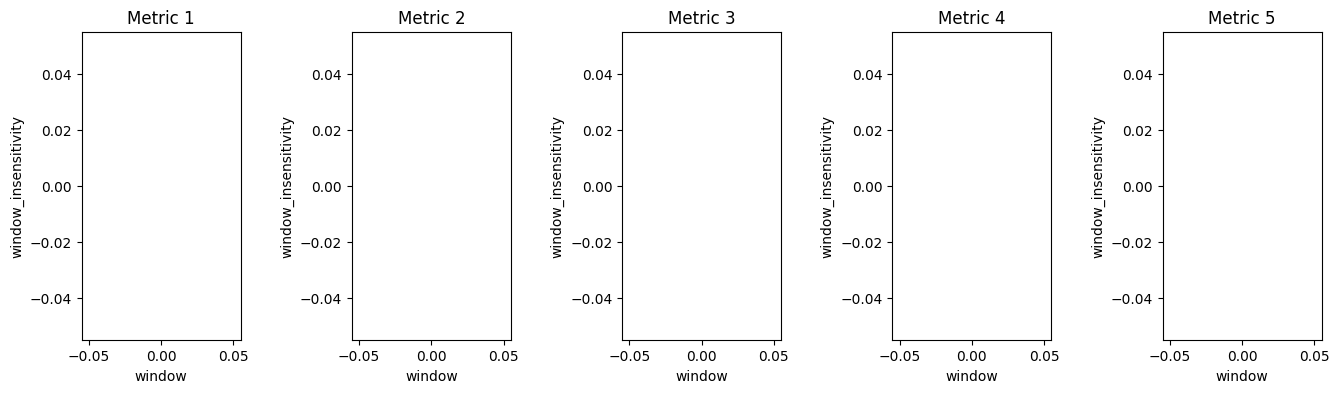

In [40]:
f = plt.figure(figsize=(16,4))
grid = gridspec.GridSpec(1, len(metrics),wspace =0.7)
for i in metrics:
    globals()['ax'+str(i)] = f.add_subplot(grid[i-1])
    history[history.No_metric==i].plot.scatter(x='window',y='window_insensitivity', c='Standart', colormap='viridis',ax=globals()['ax'+str(i)])
    globals()['ax'+str(i)].set_title(f"Metric {i}")
    
plt.show()

In [41]:
No_metric= 5
window= 150
window_insensitivity = 20

predicted_cp=[]
for i,df in enumerate(list_of_df):
    acci = df.change_points
    a = Anomaly_detection(df)
    a.tensor = tensors[i]
    a.proc_tensor(No_metric=No_metric,window=window, window_insensitivity=window_insensitivity)
    predicted_cp.append(a.bin_metric)

AttributeError: 'str' object has no attribute 'change_points'

# Metrics calculation

In [42]:
from tsad.evaluating.evaluating import evaluating

In [46]:
nab = evaluating(true_cp, predicted_cp[0], metric='nab', numenta_time='30 sec')


IndexError: list index out of range

In [38]:
add = evaluating(true_cp[0], predicted_cp[0], metric='average_time', numenta_time='30 sec')

Intersection of scoring windows(Timestamp('1970-01-01 00:18:00'), Timestamp('1970-01-01 00:17:54'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:24'), Timestamp('1970-01-01 00:18:16'))
Intersection of scoring windows(Timestamp('1970-01-01 00:18:46'), Timestamp('1970-01-01 00:18:31'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:01'), Timestamp('1970-01-01 00:18:45'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:15'), Timestamp('1970-01-01 00:19:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:19:31'), Timestamp('1970-01-01 00:19:13'))
Intersection of scoring windows(Timestamp('1970-01-01 00:23:33'), Timestamp('1970-01-01 00:23:25'))
Intersection of scoring windows(Timestamp('1970-01-01 00:30:52'), Timestamp('1970-01-01 00:30:47'))
Intersection of scoring windows(Timestamp('1970-01-01 00:36:01'), Timestamp('1970-01-01 00:36:01'))
Intersection of scoring windows(Timestamp('1970-01-01 00:53:29'), Timestamp('1970-01-01 00:53:17'))


In [39]:
nab = evaluating(true_cp[1], predicted_cp[1], metric='nab', numenta_time='30 sec')

Standart  -  5.28
LowFP  -  1.78
LowFN  -  8.02


In [40]:
add = evaluating(true_cp[1], predicted_cp[1], metric='average_time', numenta_time='30 sec')

Amount of true anomalies 37
A number of missed CPs = 32
A number of FPs = 20
Average time 0 days 00:00:10.800000


In [7]:
FPs = 11
FPN = 49
TP = 52 - 49
average_time = 6

In [8]:
standart = 1.72

In [9]:
TP /(FPs+TP) # PRECISION

0.21428571428571427

In [11]:
TP/(FPN + TP) # RECALL

0.057692307692307696

In [12]:
2*0.21*0.05/(0.05+0.21)

0.08076923076923077